In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline
pc.config.cloudy_exe = '/usr/local/Cloudy/c17.01/source/cloudy.exe'

## A small grid of models is done, with varying the ionizing SED

In [3]:
# Teff = 30,000K
Min = pc.CloudyInput('../models/M2_1')
Min.set_BB(Teff=30000, lumi_unit='ionization parameter', lumi_value=-2)
Min.set_cste_density(0)
Min.set_stop(('zone = 1'))
Min.set_other(('Cosmic Rays Background', 'set dr 0'))
Min.print_input()

In [4]:
# Teff = 50,000K. No need to redefine all the parameter, only the name and SED are changed 
Min.model_name = '../models/M2_2'
Min.set_star() # This is needed to reset the SED. Otherwise, this SED is ADDED to the previous one.
Min.set_BB(Teff=50000, lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [5]:
# Teff = 100,000K
Min.model_name = '../models/M2_3'
Min.set_star()
Min.set_BB(Teff=100000, lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [6]:
# Teff = 160,000K
Min.model_name = '../models/M2_4'
Min.set_star()
Min.set_BB(Teff=160000, lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [7]:
# A power law
Min.model_name = '../models/M2_5'
Min.set_star()
Min.set_star(SED = 'table power law', SED_params = '', 
             lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [8]:
# AGN spectum
Min.model_name = '../models/M2_6'
Min.set_star()
Min.set_star(SED = 'table AGN', SED_params = '', lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [9]:
# The 6 models are run in parallel
pc.run_cloudy(dir_='../models', n_proc=6, use_make=True, model_name='M2_')

In [10]:
# Reading the 6 model outputs into a list of CloudyModel objects
Ms = pc.load_models('../models/M2_', read_emis=False)

In [11]:
print(Ms)

[<Cloudy model from ../models/M2_1>, <Cloudy model from ../models/M2_2>, <Cloudy model from ../models/M2_3>, <Cloudy model from ../models/M2_4>, <Cloudy model from ../models/M2_5>, <Cloudy model from ../models/M2_6>]


In [13]:
# Some useful functions are available. This one extract a string from anoter string
from pyCloudy.utils.misc import sextract
# Have a look at the SED1 output. We are looking at the average nu value <nu>
M = Ms[0]
M.out

{'###First': ' ####  1  Te:5.645E+03 Hden:1.000E+00 Ne:1.100E+00 R:1.000E+30 R-R0:5.000E-01 dR:1.000E+00 NTR: 13 Htot:2.902E-24 T912: 3.71e-21###\n',
 'Blackbody': '                       * Blackbody 30000.000000                                                          *\n',
 'Chem1': '        H :  0.0000  He: -1.0000  Li: -8.6904  Be:-10.5800  B : -9.2097  C : -3.6108  N : -4.0701  O : -3.3098  F : -7.5200\n',
 'Chem2': '        Ne: -4.0000  Na: -5.6696  Mg: -4.4597  Al: -5.5302  Si: -4.4597  P : -6.4949  S : -4.7352  Cl: -6.7190  Ar: -5.6003\n',
 'Chem3': '        K : -6.8794  Ca: -5.6402  Sc: -8.8297  Ti: -6.9788  V : -8.0000  Cr: -6.3298  Mn: -6.5406  Fe: -4.5498  Co: -7.0799\n',
 'Chem4': '                                               Ni: -5.7496  Cu: -7.7905  Zn: -7.4001\n',
 'Cloudy ends': ' Cloudy ends: 1 zone, 1 iteration, 5 cautions. (single thread) ExecTime(s) 6.84\n',
 'Hbeta': 'H  1      4861.36A  -24.600    1.0000      C  3      884.524A  -26.306    0.0197      O  2     

In [16]:
# Using list comprehension to define some lists
mean_Es = [np.float(sextract(M.out['SED1'], 'Average nu:', 'I(')) for M in Ms]
T0s = [M.T0 for M in Ms]
for mean_E, T0 in zip(mean_Es, T0s):
    print(mean_E,T0)

1.258 5645.4
1.49 6555.9
2.176 11637.0
3.091 15182.0
9.206 17672.0
3.035 12311.0


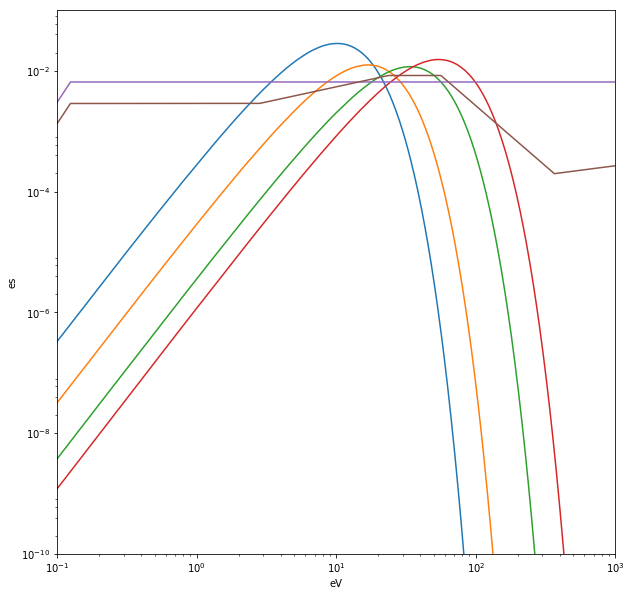

In [17]:
# Plot all the input spectra
f, ax = plt.subplots(figsize=(10,10))
for M in Ms:
    M.plot_spectrum(ax=ax)
ax.set_xlim((0.1, 1000))
ax.set_ylim((1e-10, 1e-1));

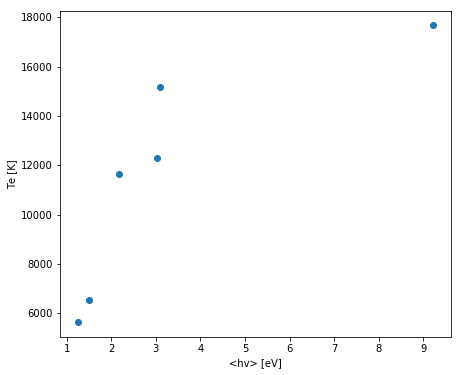

In [19]:
# lot the variation of the electron temperature versus 
# the average energy of the incomming ionizing photons
f, ax = plt.subplots(figsize=(7,6))
ax.scatter(mean_Es, T0s)
ax.set_xlabel('<hv> [eV]')
ax.set_ylabel('Te [K]')